# Exploring Video Game Sales

This dataset contains a list of video games with sales greater than 100,000 copies.

In this project I will deal only with exploratory analysis, where the objective is to understand how the data is distributed and generate insight for future decision-making, this analysis aims to explore as much as possible the data in a simple, intuitive and informative way. The data used in this project contains information only from 1980 to 2016.


### Data information : 
Rank - Ranking of overall sales, integer

Name - The games name

Platform - Platform of the games release (i.e. PC,PS4, etc.), object

Year - Year of the game's release, float

Genre - Genre of the game ,object

Publisher - Publisher of the game, object

NA_Sales - Sales in North America (in millions), float

EU_Sales - Sales in Europe (in millions), float

JP_Sales - Sales in Japan (in millions), float

Other_Sales - Sales in the rest of the world (in millions), float

Global_Sales - Total worldwide sales, float

## Import necessary libraries

In [1]:
import numpy as np
import pandas as pd
pd.set_option('display.max_columns', None)


import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns
sns.set_style('whitegrid')

## Read the data

In [2]:
data = pd.read_csv('../data/vgsales.csv')
data.head()

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16598 entries, 0 to 16597
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Rank          16598 non-null  int64  
 1   Name          16598 non-null  object 
 2   Platform      16598 non-null  object 
 3   Year          16327 non-null  float64
 4   Genre         16598 non-null  object 
 5   Publisher     16540 non-null  object 
 6   NA_Sales      16598 non-null  float64
 7   EU_Sales      16598 non-null  float64
 8   JP_Sales      16598 non-null  float64
 9   Other_Sales   16598 non-null  float64
 10  Global_Sales  16598 non-null  float64
dtypes: float64(6), int64(1), object(4)
memory usage: 1.4+ MB


In [4]:
data.describe()

,Rank,Year,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
count,16598.000000,16327.000000,16598.000000,16598.000000,16598.000000,16598.000000,16598.000000
mean,8300.605254,2006.406443,0.264667,0.146652,0.077782,0.048063,0.537441
std,4791.853933,5.828981,0.816683,0.505351,0.309291,0.188588,1.555028
min,1.000000,1980.000000,0.000000,0.000000,0.000000,0.000000,0.010000
25%,4151.250000,2003.000000,0.000000,0.000000,0.000000,0.000000,0.060000
50%,8300.500000,2007.000000,0.080000,0.020000,0.000000,0.010000,0.170000
75%,12449.750000,2010.000000,0.240000,0.110000,0.040000,0.040000,0.470000
max,16600.000000,2020.000000,41.490000,29.020000,10.220000,10.570000,82.740000


In [5]:
data.describe(exclude=np.number)

,Name,Platform,Genre,Publisher
count,16598,16598,16598,16540
unique,11493,31,12,578
top,Need for Speed: Most Wanted,DS,Action,Electronic Arts
freq,12,2163,3316,1351


### Observation and Questions
1. Year is in flot. Possible missing values
2. Does each game have 1 row for each platform?
3. Region wise genre preferences
4. Top 10 sellers (overall and region-specific)
5. Platform specific sales trendline
6. Genre specific sales trendline
7. Publisher sales trendline
8. Top 3 publishers and genres they work in. Split by region
9. Global sales trendline
10. Region specific sales. Split by genre
11. What kind of games don't sell much!

### Check for null values

In [6]:
data.isnull().sum()/len(data) * 100

Rank            0.000000
Name            0.000000
Platform        0.000000
Year            1.632727
Genre           0.000000
Publisher       0.349440
NA_Sales        0.000000
EU_Sales        0.000000
JP_Sales        0.000000
Other_Sales     0.000000
Global_Sales    0.000000
dtype: float64

In [7]:
data[data['Year'].isnull()]['Platform'].value_counts()

Wii     35
PS2     34
DS      30
X360    30
PS3     25
XB      21
2600    17
PC      17
PSP     16
GC      14
GBA     11
3DS      9
PS       7
N64      3
PSV      1
GB       1
Name: Platform, dtype: int64

In [8]:
data.pivot_table(index='Year', columns='Platform', values='Name', aggfunc='count')

Platform,2600,3DO,3DS,DC,DS,GB,GBA,GC,GEN,GG,N64,NES,NG,PC,PCFX,PS,PS2,PS3,PS4,PSP,PSV,SAT,SCD,SNES,TG16,WS,Wii,WiiU,X360,XB,XOne
Year,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1980.0,9.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1981.0,46.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1982.0,36.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1983.0,11.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1984.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,13.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1985.0,1.0,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,11.0,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1986.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,19.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1987.0,6.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1988.0,2.0,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,11.0,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [9]:
# Let's impute the null values of column Year by taking median of years and rounding it
#data.groupby('Platform')['Year'].median().round()

# Reference: https://stackoverflow.com/questions/41680089/how-to-fillna-by-groupby-outputs-in-pandas
data['Year'] = data['Year'].fillna(data.groupby('Platform')['Year'].transform('median').apply(lambda x: np.floor(x)))

In [10]:
data.isnull().sum()

Rank             0
Name             0
Platform         0
Year             0
Genre            0
Publisher       58
NA_Sales         0
EU_Sales         0
JP_Sales         0
Other_Sales      0
Global_Sales     0
dtype: int64

In [11]:
# Drop rows with missing publisher as it does not make sense to impute it
data.dropna(inplace=True)

In [12]:
data['Year'] = data['Year'].astype(int)

In [13]:
data.isnull().sum()

Rank            0
Name            0
Platform        0
Year            0
Genre           0
Publisher       0
NA_Sales        0
EU_Sales        0
JP_Sales        0
Other_Sales     0
Global_Sales    0
dtype: int64

In [14]:
data.dtypes

Rank              int64
Name             object
Platform         object
Year              int32
Genre            object
Publisher        object
NA_Sales        float64
EU_Sales        float64
JP_Sales        float64
Other_Sales     float64
Global_Sales    float64
dtype: object

### Does each game have 1 row for different platforms?

In [15]:
data[data['Name'] == 'Wii de Asobu: Metroid Prime']

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
14997,15000,Wii de Asobu: Metroid Prime,Wii,2009,Shooter,Nintendo,0.0,0.0,0.02,0.0,0.02
14999,15002,Wii de Asobu: Metroid Prime,Wii,2009,Shooter,Nintendo,0.0,0.0,0.02,0.0,0.02


In [16]:
# Let's ensure all the game names are unique per year per platform
validation = pd.DataFrame(data.groupby(['Name', 'Platform', 'Year'])['Name'].count())
validation[validation['Name']>1]

,,,Name
Name,Platform,Year,
Madden NFL 13,PS3,2012,2
Wii de Asobu: Metroid Prime,Wii,2009,2


In [17]:
# Drop duplicates based on name, year and platform
data.drop_duplicates(subset=['Name', 'Platform', 'Year'], inplace=True)

In [18]:
# Let's ensure all the game names are unique per year per platform
validation = pd.DataFrame(data.groupby(['Name', 'Platform', 'Year'])['Name'].count())
validation[validation['Name']>1]

,,,Name
Name,Platform,Year,


## What genre games have been made the most?


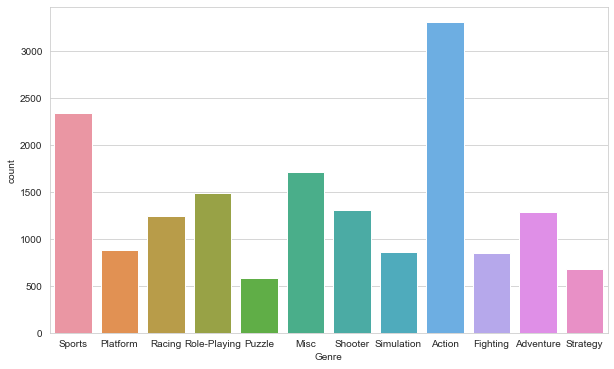

In [19]:
plt.figure(figsize=(10, 6))
sns.countplot(x='Genre', data=data)
plt.show()

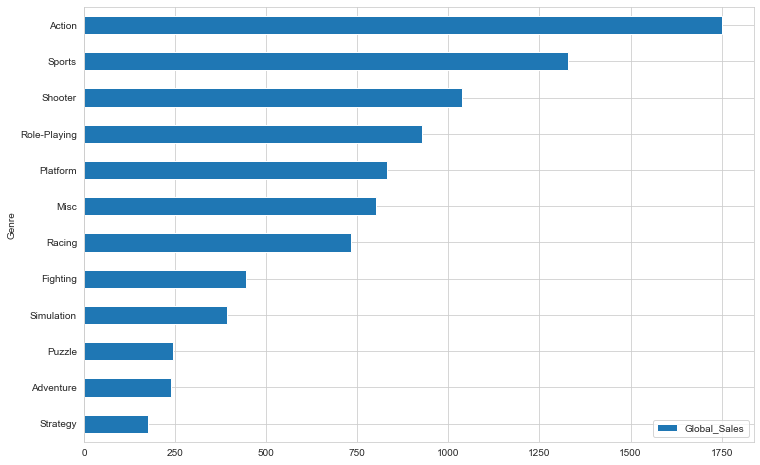

In [20]:
# Which genre makes most sales
data.pivot_table(index='Genre', values='Global_Sales', aggfunc='sum').sort_values(by='Global_Sales').plot.barh(figsize=(12, 8))
plt.show()

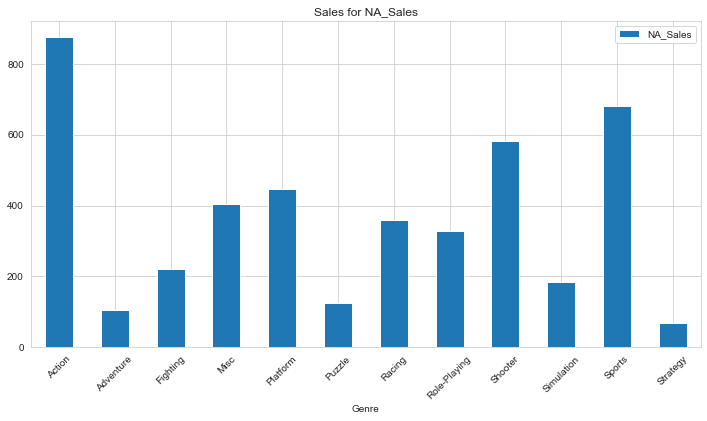

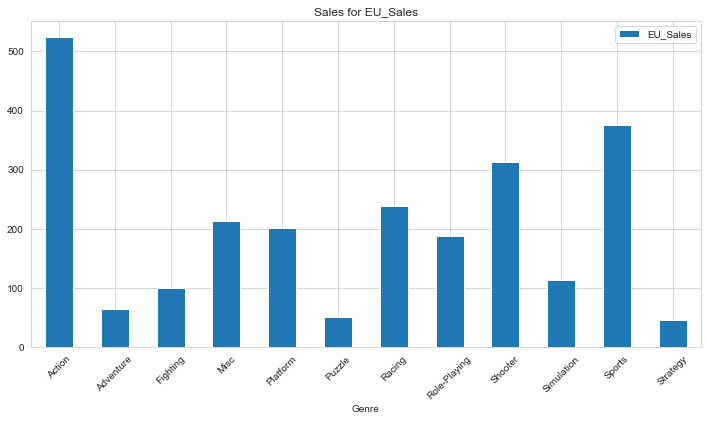

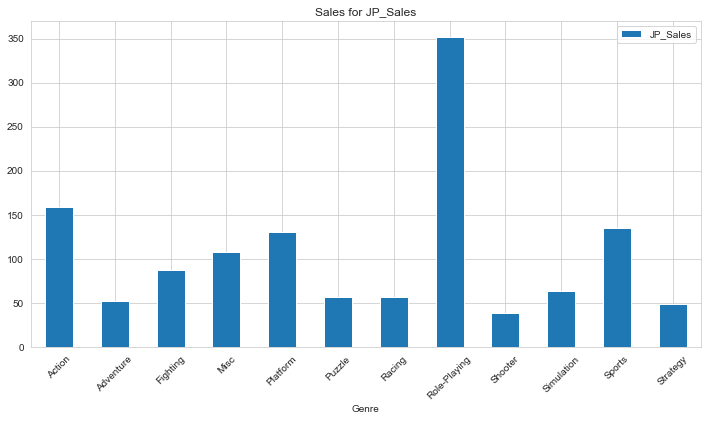

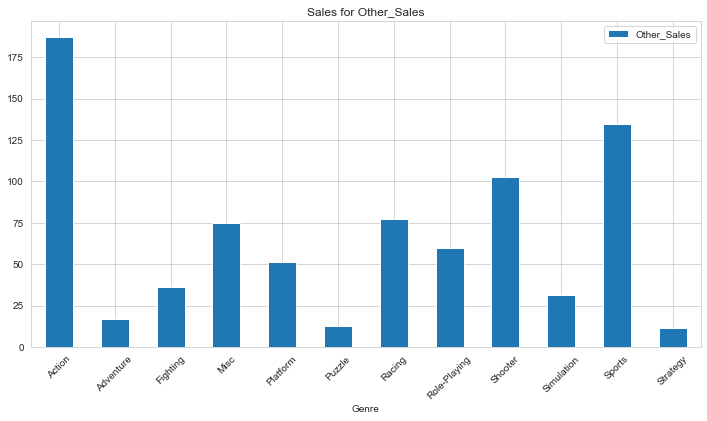

In [21]:
for region in ['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales']:
    data.pivot_table(index='Genre', values=region, aggfunc='sum').plot.bar(figsize=(12, 6), rot=45)
    plt.title(f'Sales for {region}')
    plt.show()

## Which year had the most game releases?

Replicate from the previous code

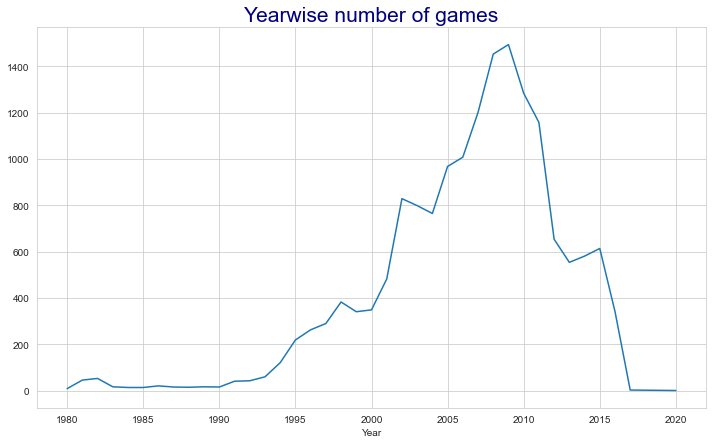

In [22]:
data.groupby('Year')['Name'].count().plot(figsize=(12, 7))
plt.title('Yearwise number of games', fontsize=21, color='navy')
plt.show()

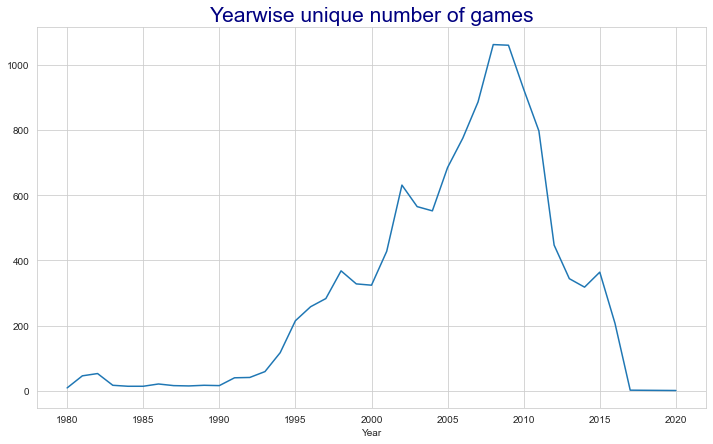

In [23]:
data.groupby('Year')['Name'].nunique().plot(figsize=(12, 7))
plt.title('Yearwise unique number of games', fontsize=21, color='navy')
plt.show()

### Top 10 sellers global and region specific

In [24]:
sales_name = data.pivot_table(index='Name', values=['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales', 'Global_Sales'], aggfunc='sum')
sales_name.sort_values('Global_Sales', ascending=False)

,EU_Sales,Global_Sales,JP_Sales,NA_Sales,Other_Sales
Name,,,,,
Wii Sports,29.02,82.74,3.77,41.49,8.46
Grand Theft Auto V,23.04,55.92,1.39,23.46,8.03
Super Mario Bros.,4.88,45.31,6.96,32.48,0.99
Tetris,2.95,35.84,6.03,26.17,0.69
Mario Kart Wii,12.88,35.82,3.79,15.85,3.31
...,...,...,...,...,...
Wade Hixton's Counter Punch,0.00,0.01,0.00,0.01,0.00
Musou Tourou,0.00,0.01,0.01,0.00,0.00
Kao the Kangaroo,0.00,0.01,0.00,0.01,0.00


### Top 10 publishers global and region specific

In [25]:
sales_publisher = data.pivot_table(index='Publisher', values=['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales', 'Global_Sales'], aggfunc='sum')
sales_publisher.sort_values('Global_Sales', ascending=False)

,EU_Sales,Global_Sales,JP_Sales,NA_Sales,Other_Sales
Publisher,,,,,
Nintendo,418.74,1786.54,455.40,816.87,95.33
Electronic Arts,371.26,1110.31,14.04,595.07,129.77
Activision,215.53,727.46,6.54,429.70,75.34
Sony Computer Entertainment,187.72,607.50,74.10,265.22,80.45
Ubisoft,163.32,474.72,7.50,253.43,50.26
...,...,...,...,...,...
Ongakukan,0.00,0.01,0.01,0.00,0.00
Commseed,0.00,0.01,0.01,0.00,0.00
Takuyo,0.00,0.01,0.01,0.00,0.00


**Is there correlation between sales numbers in NA and JP region?**

In [26]:
sales_name['NA_Sales'].corr(sales_name['JP_Sales'])

0.40598340537493305

In [27]:
sales_publisher['NA_Sales'].corr(sales_publisher['JP_Sales'])

0.7063272567842287

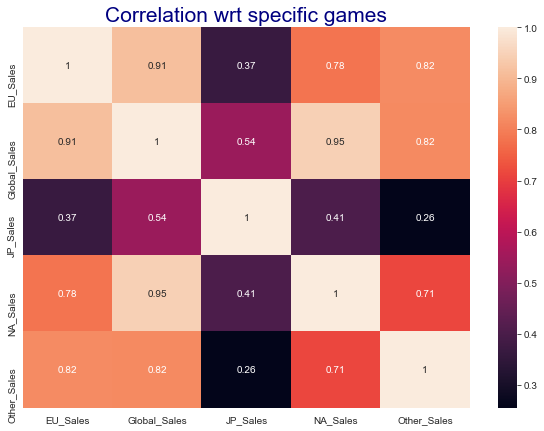

In [28]:
plt.figure(figsize=(10, 7))
sns.heatmap(sales_name.corr(), annot=True)
plt.title('Correlation wrt specific games', fontsize=21, color='navy')
plt.show()

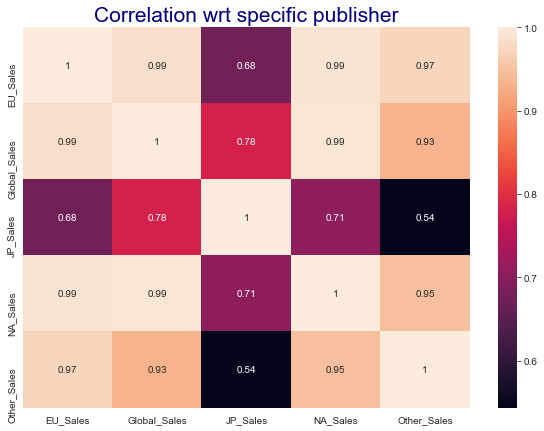

In [29]:
plt.figure(figsize=(10, 7))
sns.heatmap(sales_publisher.corr(), annot=True)
plt.title('Correlation wrt specific publisher', fontsize=21, color='navy')
plt.show()

In [30]:
sales_platform = data.pivot_table(index='Platform', values=['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales', 'Global_Sales'], aggfunc='sum')
sales_platform.sort_values('Global_Sales', ascending=False)

,EU_Sales,Global_Sales,JP_Sales,NA_Sales,Other_Sales
Platform,,,,,
PS2,338.19,1252.43,139.20,582.17,193.00
X360,280.54,979.89,12.42,601.04,85.54
PS3,343.22,957.28,79.92,392.26,141.93
Wii,268.33,926.34,69.19,507.56,80.60
DS,194.63,822.19,175.34,390.67,60.53
PS,213.02,729.07,139.78,335.65,40.80
GBA,73.15,310.29,47.06,181.85,7.62
PSP,68.25,296.10,76.67,108.93,42.19
PS4,123.70,278.10,14.30,96.80,43.36


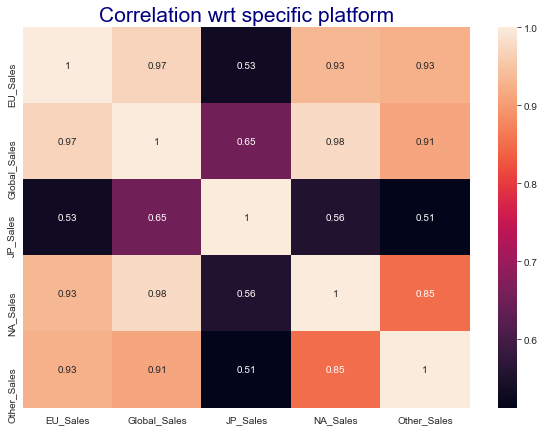

In [31]:
plt.figure(figsize=(10, 7))
sns.heatmap(sales_platform.corr(), annot=True)
plt.title('Correlation wrt specific platform', fontsize=21, color='navy')
plt.show()

### Publisher sales trendline

In [32]:
# data.groupby(['Publisher', 'Year'])['Global_Sales'].sum().nlargest(10)
yearwise_sales = pd.DataFrame(data[data['Publisher'].isin(['Nintendo', 'Electronic Arts', 'Activision'])].groupby(['Publisher', 'Year'])['Global_Sales'].sum())

In [33]:
yearwise_sales.reset_index(inplace=True)

In [34]:
yearwise_sales.head()

,Publisher,Year,Global_Sales
0,Activision,1980,3.02
1,Activision,1981,8.50
2,Activision,1982,2.90
3,Activision,1983,1.94
4,Activision,1984,0.27


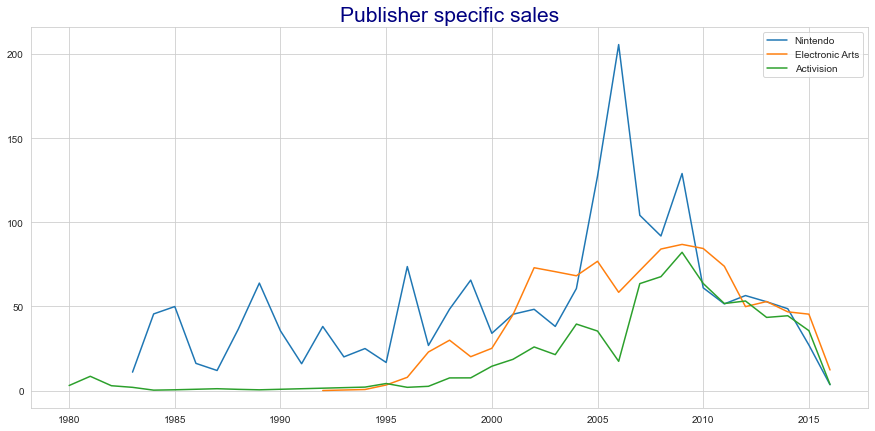

In [35]:
fig = plt.figure(figsize=(15, 7))
for pub in ['Nintendo', 'Electronic Arts', 'Activision']:
    _data = yearwise_sales[yearwise_sales['Publisher']==pub]
    _data.set_index('Year', inplace=True)
    plt.plot(_data['Global_Sales'], label=pub)

plt.title('Publisher specific sales', fontsize=21, color='navy')
plt.legend()
plt.show()

## What are the top game genres produced for the years(5) with maximum game production?

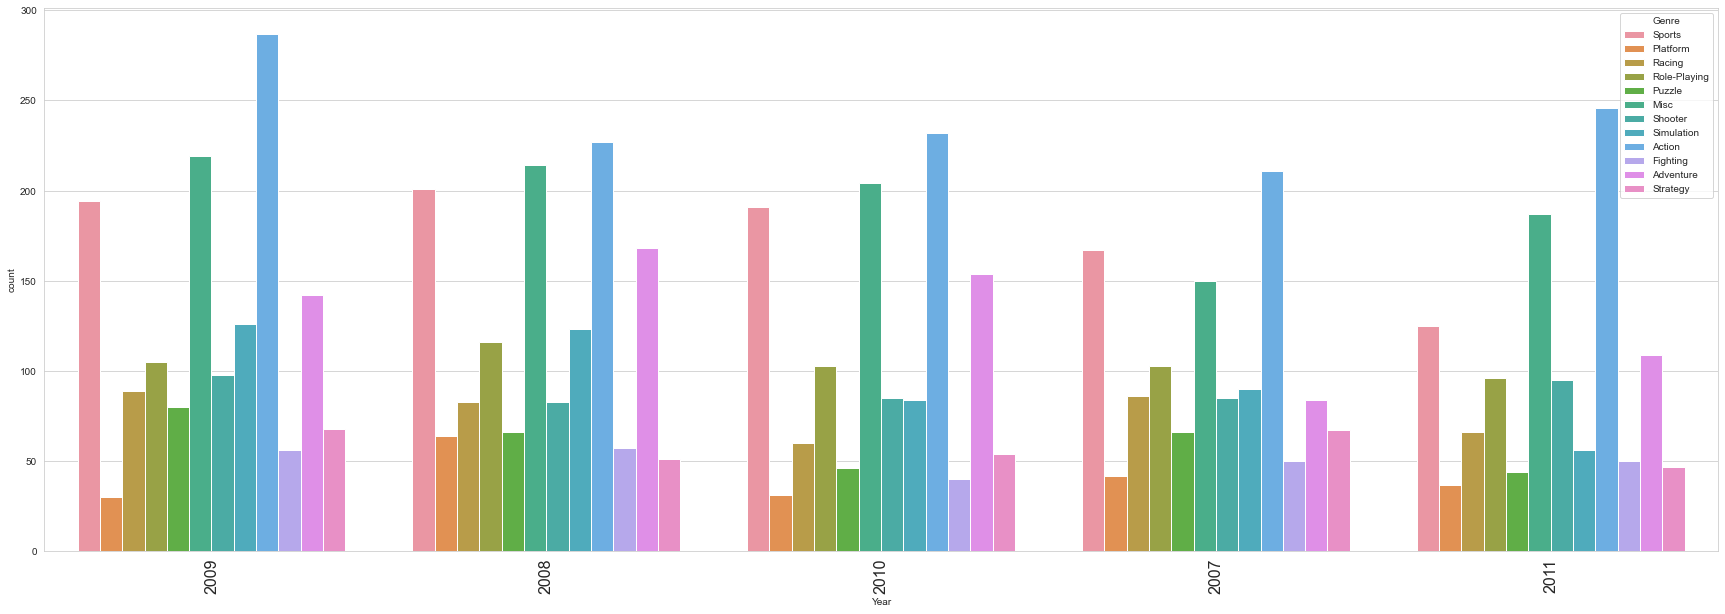

In [36]:
order = data.Year.value_counts().iloc[:5].index

plt.figure(figsize=(30, 10))
sns.countplot(x='Year', data=data, hue='Genre', order=order)
plt.xticks(size=16, rotation=90)
plt.show()

## Which genre game has sold the most in a single year?



In [37]:
year_sale_dx = data.groupby(by=['Year', 'Genre'])['Global_Sales'].sum().reset_index()

# Comparing with only the highest sales figure to get a binary value of true or false
year_sale = year_sale_dx.groupby(by=['Year'])['Global_Sales'].transform(max) == year_sale_dx['Global_Sales']

# Subsetting to keep only the highest value each year in the datframe
year_sale_max = year_sale_dx[year_sale].reset_index(drop=True)

genre = year_sale_max['Genre']

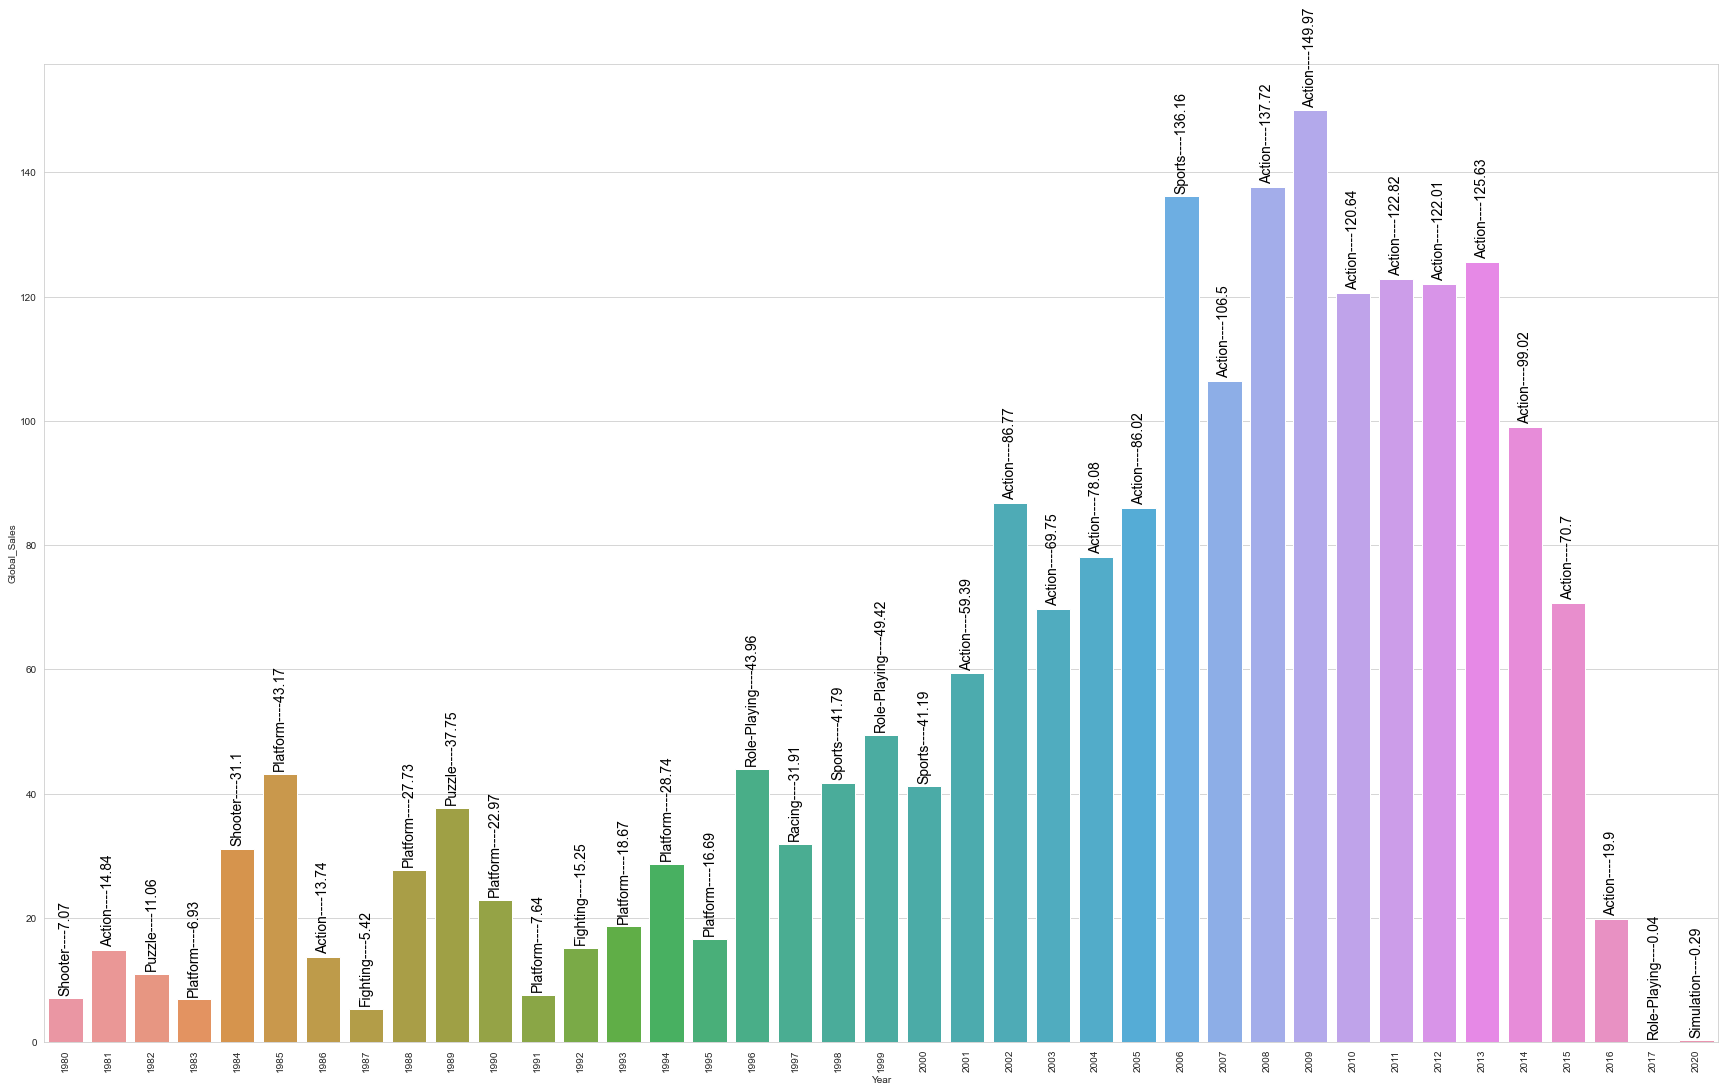

In [38]:
# plotting the bar for each year's highest genre

plt.figure(figsize=(30, 18))
g = sns.barplot(x='Year', y='Global_Sales', data=year_sale_max)

# Adding values at the top of each bar
index = 0
for value in year_sale_max['Global_Sales']:
    g.text(index, value + 1, str(genre[index] + '----' +str(round(value, 2))), color='#000', size=14, rotation= 90, ha="center")
    
    index += 1

plt.xticks(rotation=90)
plt.show()

## Which platfrom have the highest sale price globally?

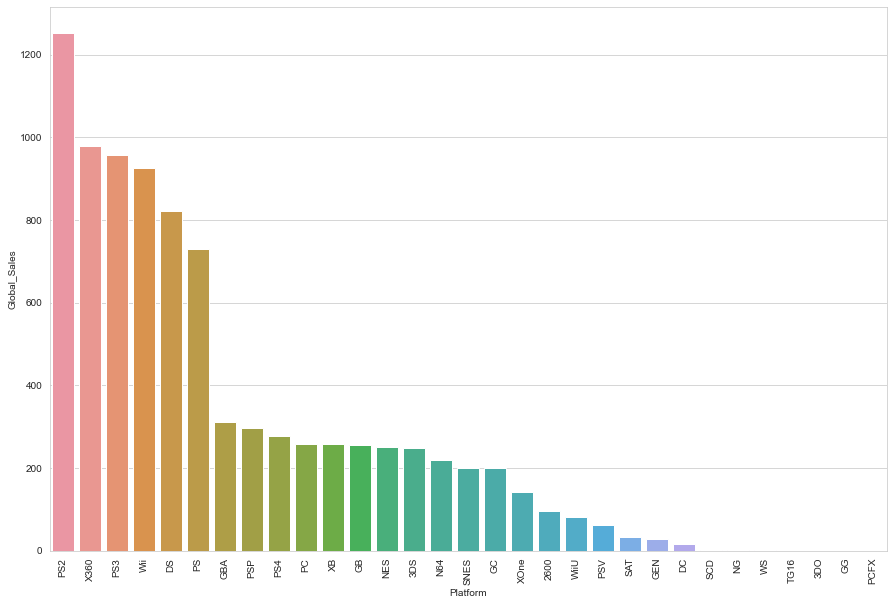

In [39]:
data_platform = data.groupby(by=['Platform'])['Global_Sales'].sum()
data_platform = data_platform.reset_index()
data_platform = data_platform.sort_values(by=['Global_Sales'], ascending=False)

plt.figure(figsize=(15, 10))
sns.barplot(x='Platform', y='Global_Sales', data=data_platform)
plt.xticks(rotation=90)
plt.show()

##  Which individual game have the highest sale price globally?

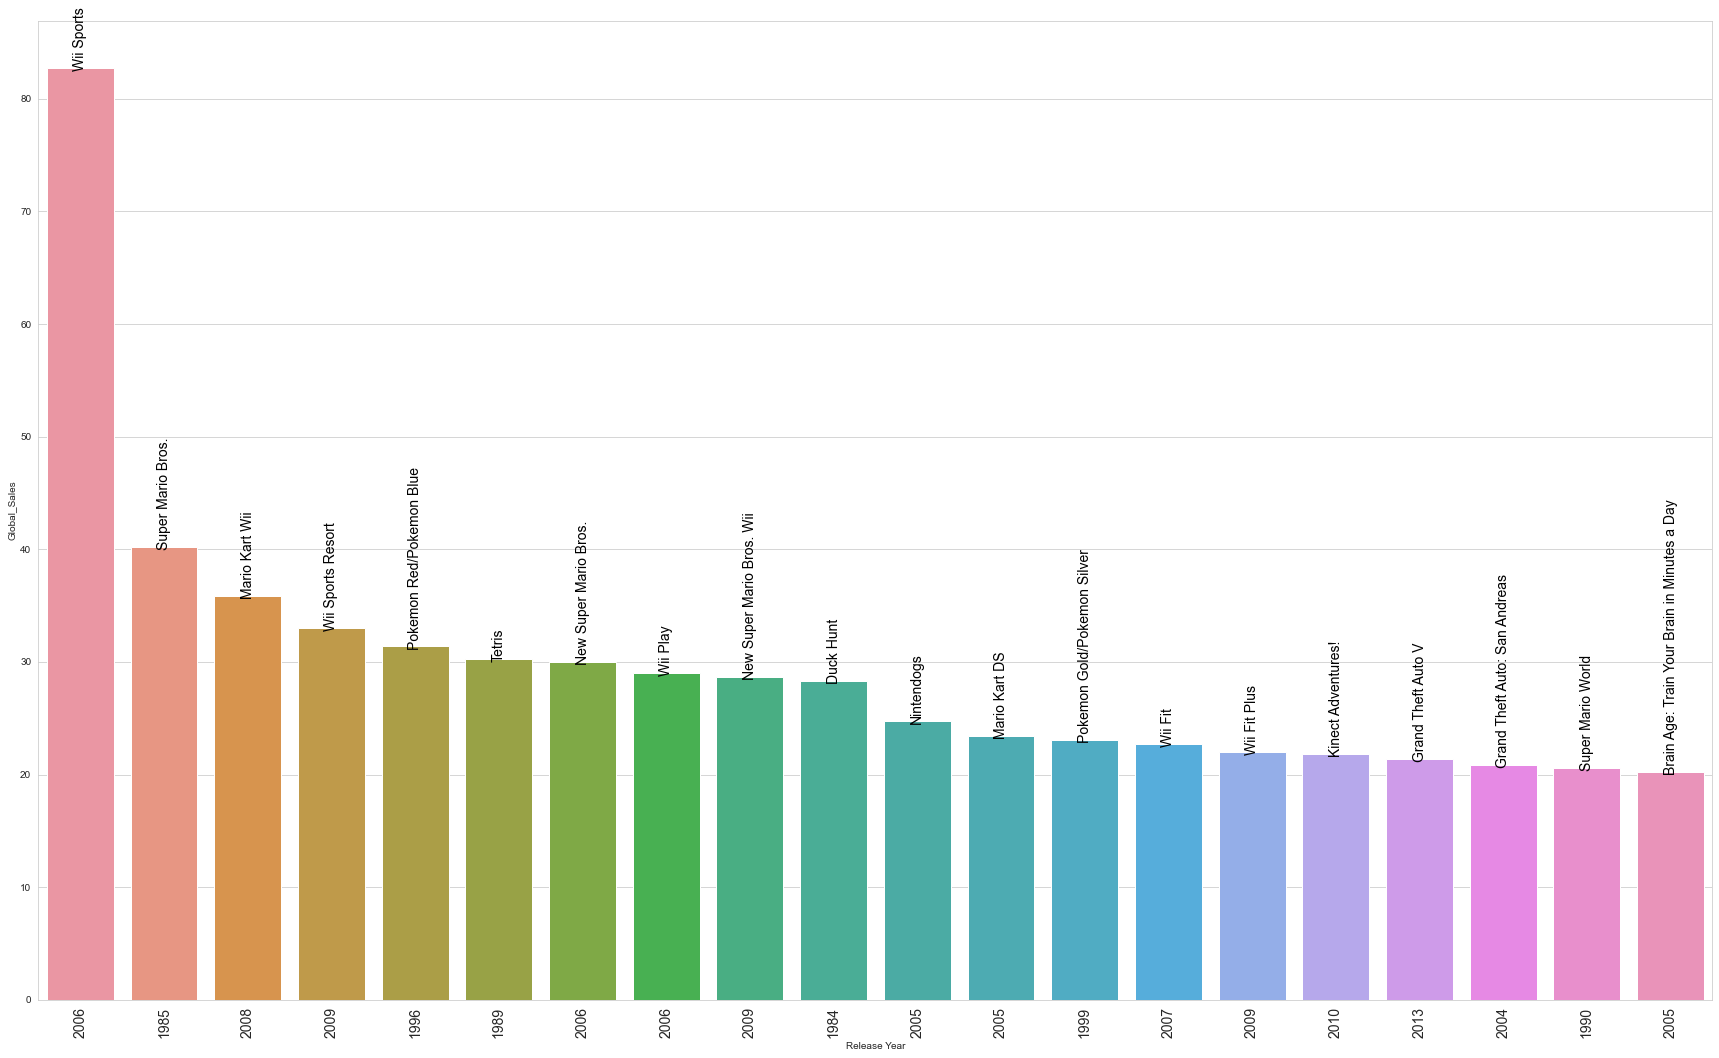

In [40]:
# data is already sorted according to global sales
top_game_sale = data.head(20)
top_game_sale = top_game_sale[['Name', 'Year', 'Genre', 'Global_Sales']]
top_game_sale = top_game_sale.sort_values(by=['Global_Sales'], ascending=False)

name = top_game_sale['Name']
year = top_game_sale['Year']
y = np.arange(0, 20)

plt.figure(figsize=(30, 18))
g = sns.barplot(x='Name', y='Global_Sales', data=top_game_sale)
index = 0
for value in top_game_sale['Global_Sales']:
    g.text(index, value, name[index], color='#000', size=14, rotation= 90, ha="center")
    index += 1

plt.xticks(y, top_game_sale['Year'], fontsize=14, rotation=90)
plt.xlabel('Release Year')
plt.show()

## Find the total revenue by region

In [41]:
top_sale_reg = data[['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales']]
top_sale_reg = top_sale_reg.sum().reset_index()
top_sale_reg = top_sale_reg.rename(columns={"index": "region", 0: "sale"})
top_sale_reg.head()

,region,sale
0,NA_Sales,4384.41
1,EU_Sales,2429.44
2,JP_Sales,1290.07
3,Other_Sales,797.08


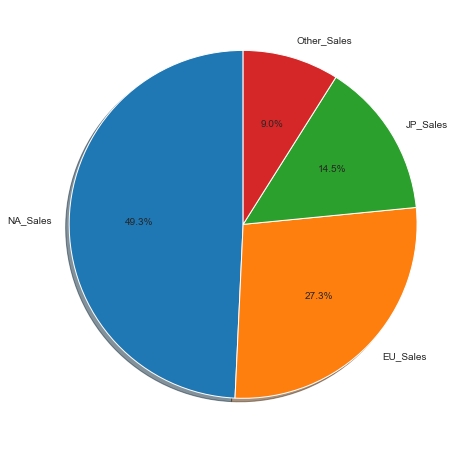

In [42]:
labels = top_sale_reg['region']
sizes = top_sale_reg['sale']

plt.figure(figsize=(10, 8))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', shadow=True, startangle=90)
plt.show()